# 3. Laboratorijske vježbe iz Numeričke matematike - zad 1

Ime i prezime: Mihael Miličević

a) Želimo odrediti godinu $\hat t$ u kojoj će ukupan broj ljudi na Zemlji prijeći 9 milijardi.  Populacija se računa prema Verhulstovom modelu
$$f(t)=\frac{a}{1-ce^{-dt}}$$
pri čemu su dani parametri:
$$a=9.9606,\quad c=-1.1085\cdot 10^{25},\quad d=0.029.$$
(vrijednost $f(t)$ računa se u milijardama). Zadatak formulirajte u obliku nelinearne jednadžbe koju treba riješiti i nacrtajte funkciju čiju nultočku tražite na intervalu $[1950, 2200]$

$$ \frac{9.9606}{1-(-1.1085\cdot 10^{25} \cdot e^{-0.029t})} -9 = 0 $$

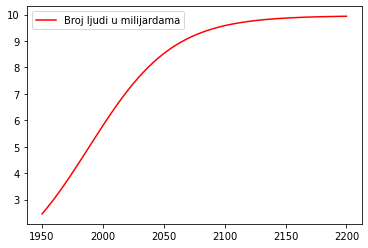

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from math import e

a = 9.9606
c = -1.1085e25
d = 0.029

f = lambda t : a / (1 - c * e ** (-d * t))

x = np.linspace(1950, 2200, 10000)
m = np.vectorize(f)

u = m(x)
fig, ax = plt.subplots()   
plt.plot(x,u,'r', label="Broj ljudi u milijardama")
ax.legend(loc='upper left')
plt.show()

b) Napišite  sada kako glasi iterativni postupak za danu funkciju ako koristite metodu sekante.

Newtonov iterativni postupak za pronalazak nultočke funkcije, uz uvjet da je početna iteracija $x_{0}$ zadana, glasi ovako:

$$ x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})} $$

Problem ovakvog pristupa je taj da je funkciju $f'(x)$ često teško eksplicitno računati, a ponekad to niti nije moguće. Zato se funkcija $f'(x)$ može aproksimirati konačnim diferencijama:

$$ f'(x) \approx \frac{f(x_{n}) - f(x_{n-1})}{x_{n} - x_{n-1}} $$

Ako se aproksimacija derivacije funkcije konačnim diferencijama uvrsti u početnu jednadžbu, dobije se izraz:

$$ x_{n+1} = x_{n} - f(x_{n})\frac{x_{n} - x_{n-1}}{f(x_{n}) - f(x_{n-1})} $$

Ova metoda naziva se metoda sekante.

c) Implementirajte metodu sekante koja uzima dvije početne iteracije (za jednu od početnih iteracija uzmite $t_0=1974$, a drugu po izboru). Kao uvjet zaustavljanja možete postaviti neki od sljedećih uvjeta: $|f(x_n)|\leq \varepsilon_1$, $|x_{n+1}-x_n|\leq \varepsilon_2$ ili određeni maksimalni broj iteracija, ako nije neki od prethodna 2 uvjeta zadovoljen. Napišite nekoliko vrijednosti niza $x_n$. Za provjeru, ispišite vrijednost funkcije u izračunatoj nultočki.

In [48]:
import matplotlib.pyplot as plt
from math import e

a = 9.9606
c = -1.1085e25
d = 0.029

f = lambda t : a / (1 - c * e ** (-d * t)) - 9

eps = 1e-10
max_iterations = 1000

t = [1974, 1975]
n = 2
iterations = 1

while abs(f(t[n-1])) > eps and iterations < max_iterations:
    next_iteration = t[n-1] - f(t[n-1]) * (t[n-1] - t[n-2]) / (f(t[n-1]) - f(t[n-2]))
    t.append(next_iteration)
    n += 1
    iterations += 1

print(f"Iteracija {iterations}: pronađeno rješenje je {t[-1]}, apsolutna greška je {abs(f(t[-1]))}")

Iteracija 8: pronađeno rješenje je 2065.6916152415656, apsolutna greška je 6.59738930153253e-12


d) Dobivenu nultočku usporedite s onom koju dobijete nekom ugrađenom metodom [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar). Odaberite metodu po izboru od onih koje smo obradili na predavanjima.

In [55]:
import matplotlib.pyplot as plt
from math import e
from scipy import optimize

a = 9.9606
c = -1.1085e25
d = 0.029

f = lambda t : a / (1 - c * e ** (-d * t)) - 9

res = optimize.root_scalar(f=f, method="secant", x0=1974, x1=1975)
print(res)

print("\nOdabrana je metoda sekante s istim početnim iteracijama kao i u prethodnom slučaju. Vidimo da su rezultati točni do na devetu decimalu uključivo.")

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 2065.691615241828

Odabrana je metoda sekante s istim početnim iteracijama kao i u prethodnom slučaju. Vidimo da su rezultati točni do na devetu decimalu uključivo.


e) Upotrijebite neku od funkcija iz SciPy biblioteke, poput [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve)  ili [link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html#scipy.optimize.broyden1) da pronađete rješenje 2 točke u kojima se kružnice
$$(x-2)^2+y^2=4$$
$$x^2+(y-3)^2=4$$
sijeku. Iz skice procijenite koje bi mogle biti pogodne početne iteracije da dobijete svaku od tih točaka.

In [58]:
from scipy.optimize import fsolve

f = lambda x : [(x[0] - 2)**2 + x[1]**2 - 4, x[0]**2 + (x[1] - 3)**2 - 4]

val1, val2 = fsolve(f, [0, 1]), fsolve(f, [2, 2])

print("Kružnice sam nacrtao u Geogebri i kao pogodne početne iteracije procijenio točke (0, 1) i (2, 2).")
print(f"Prvo rješenje:  {val1}")
print(f"Drugo rješenje: {val2}")

Kružnice sam nacrtao u Geogebri i kao pogodne početne iteracije procijenio točke (0, 1) i (2, 2).
Prvo rješenje:  [0.27942331 1.01961554]
Drugo rješenje: [1.72057669 1.98038446]
